In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset/bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [21]:
CatCols = df.select_dtypes(include=['object', 'category']).columns
NumCols = df.select_dtypes(include=['number']).columns

## Numerical Analysis

In [22]:
df[NumCols]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


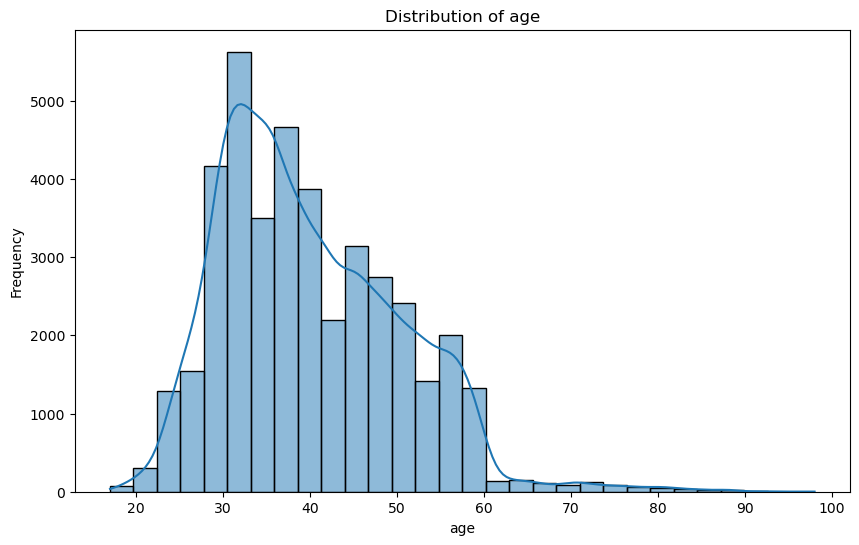

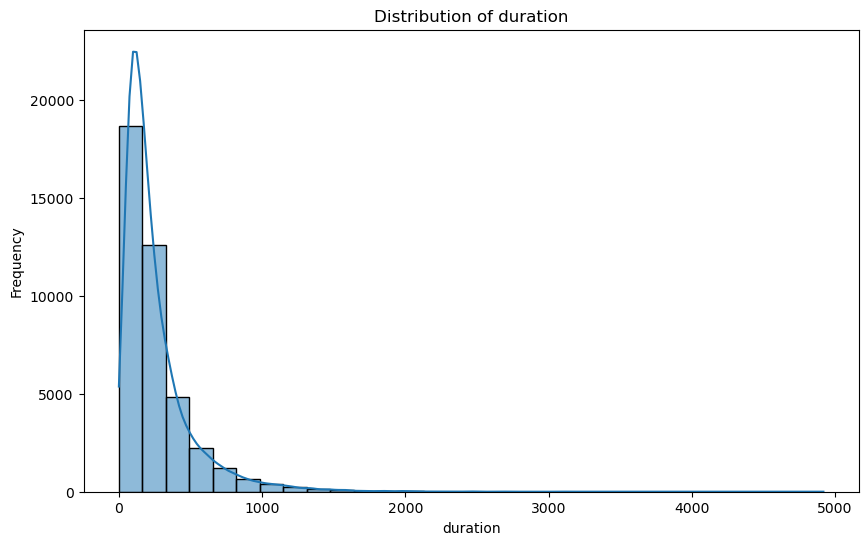

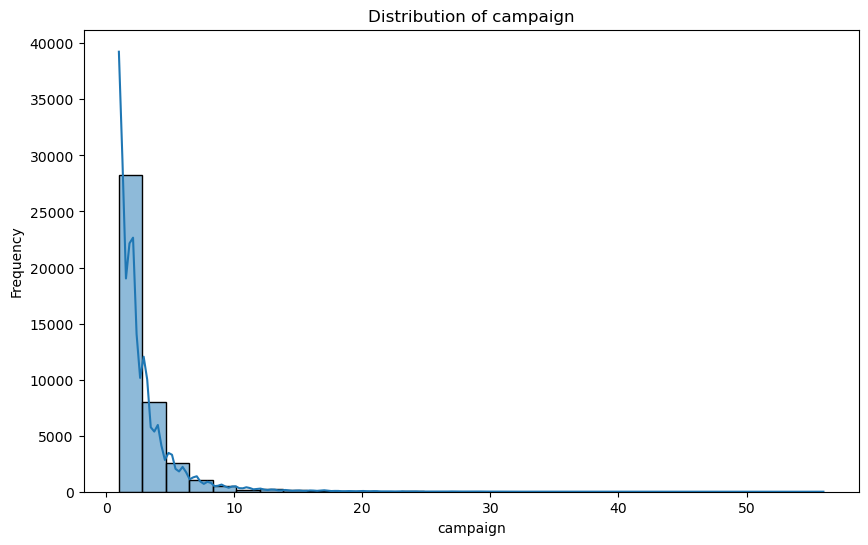

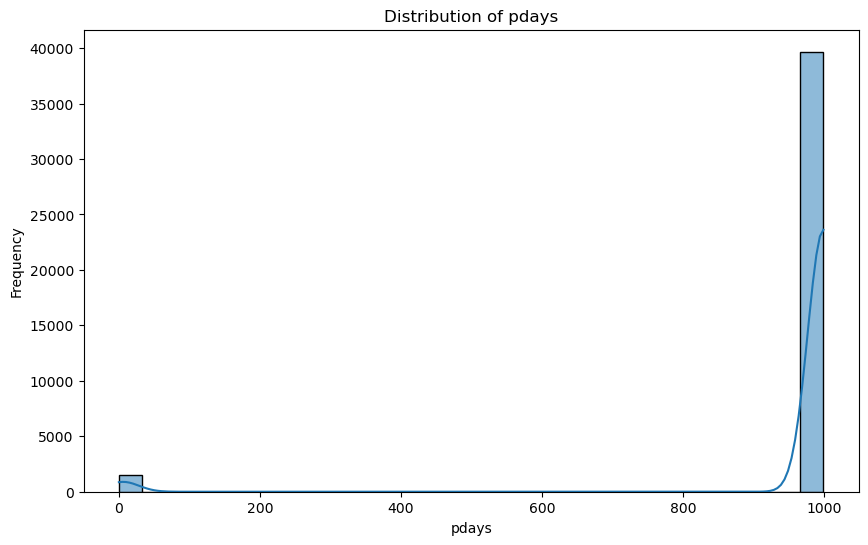

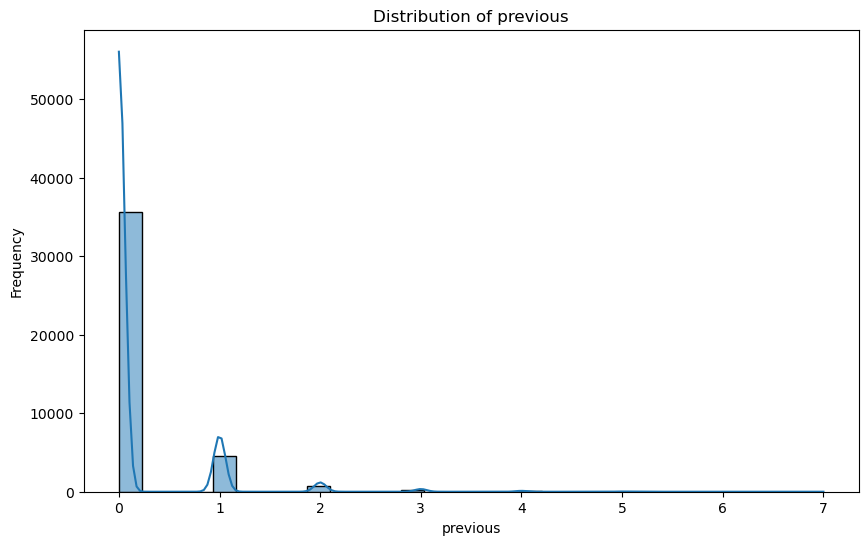

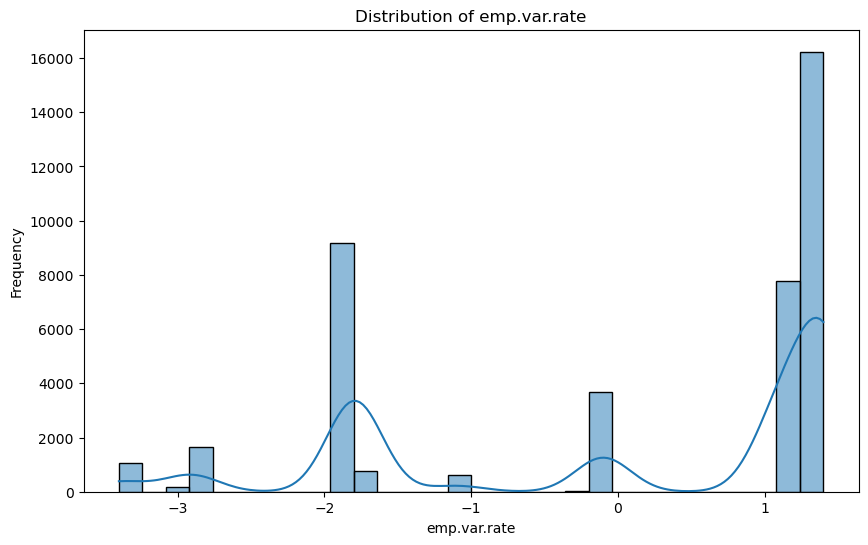

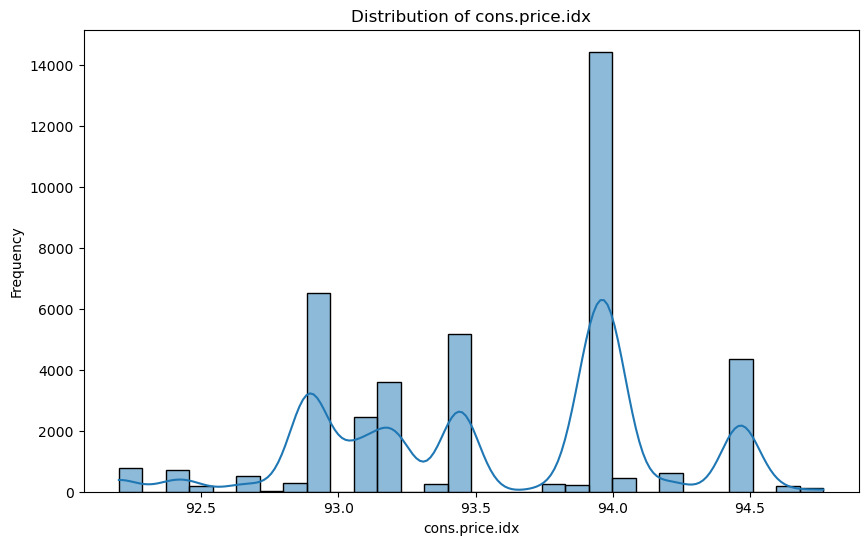

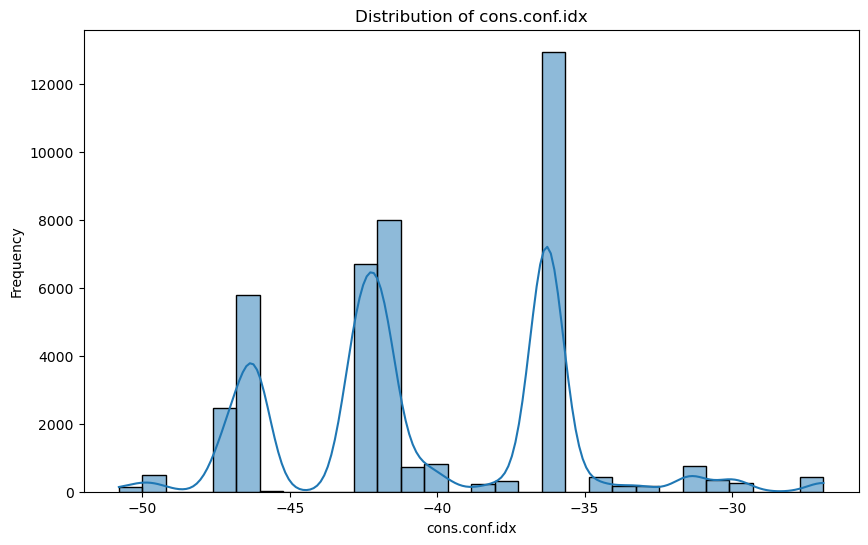

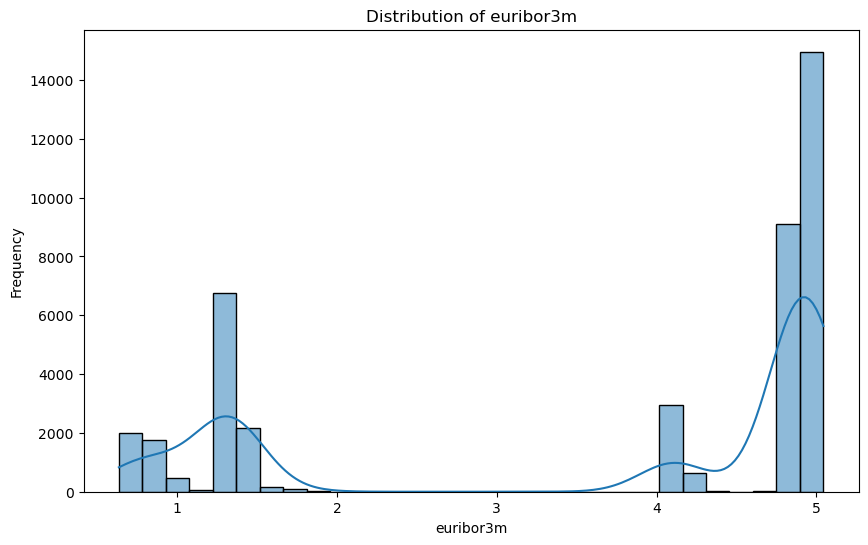

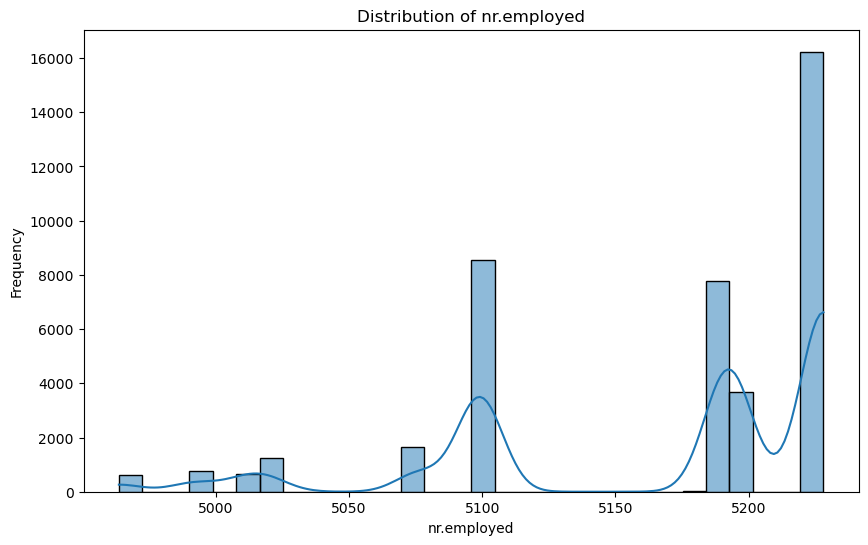

In [23]:
# Plot Distribution of Numerical Columns
for col in NumCols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Comparison with target variable

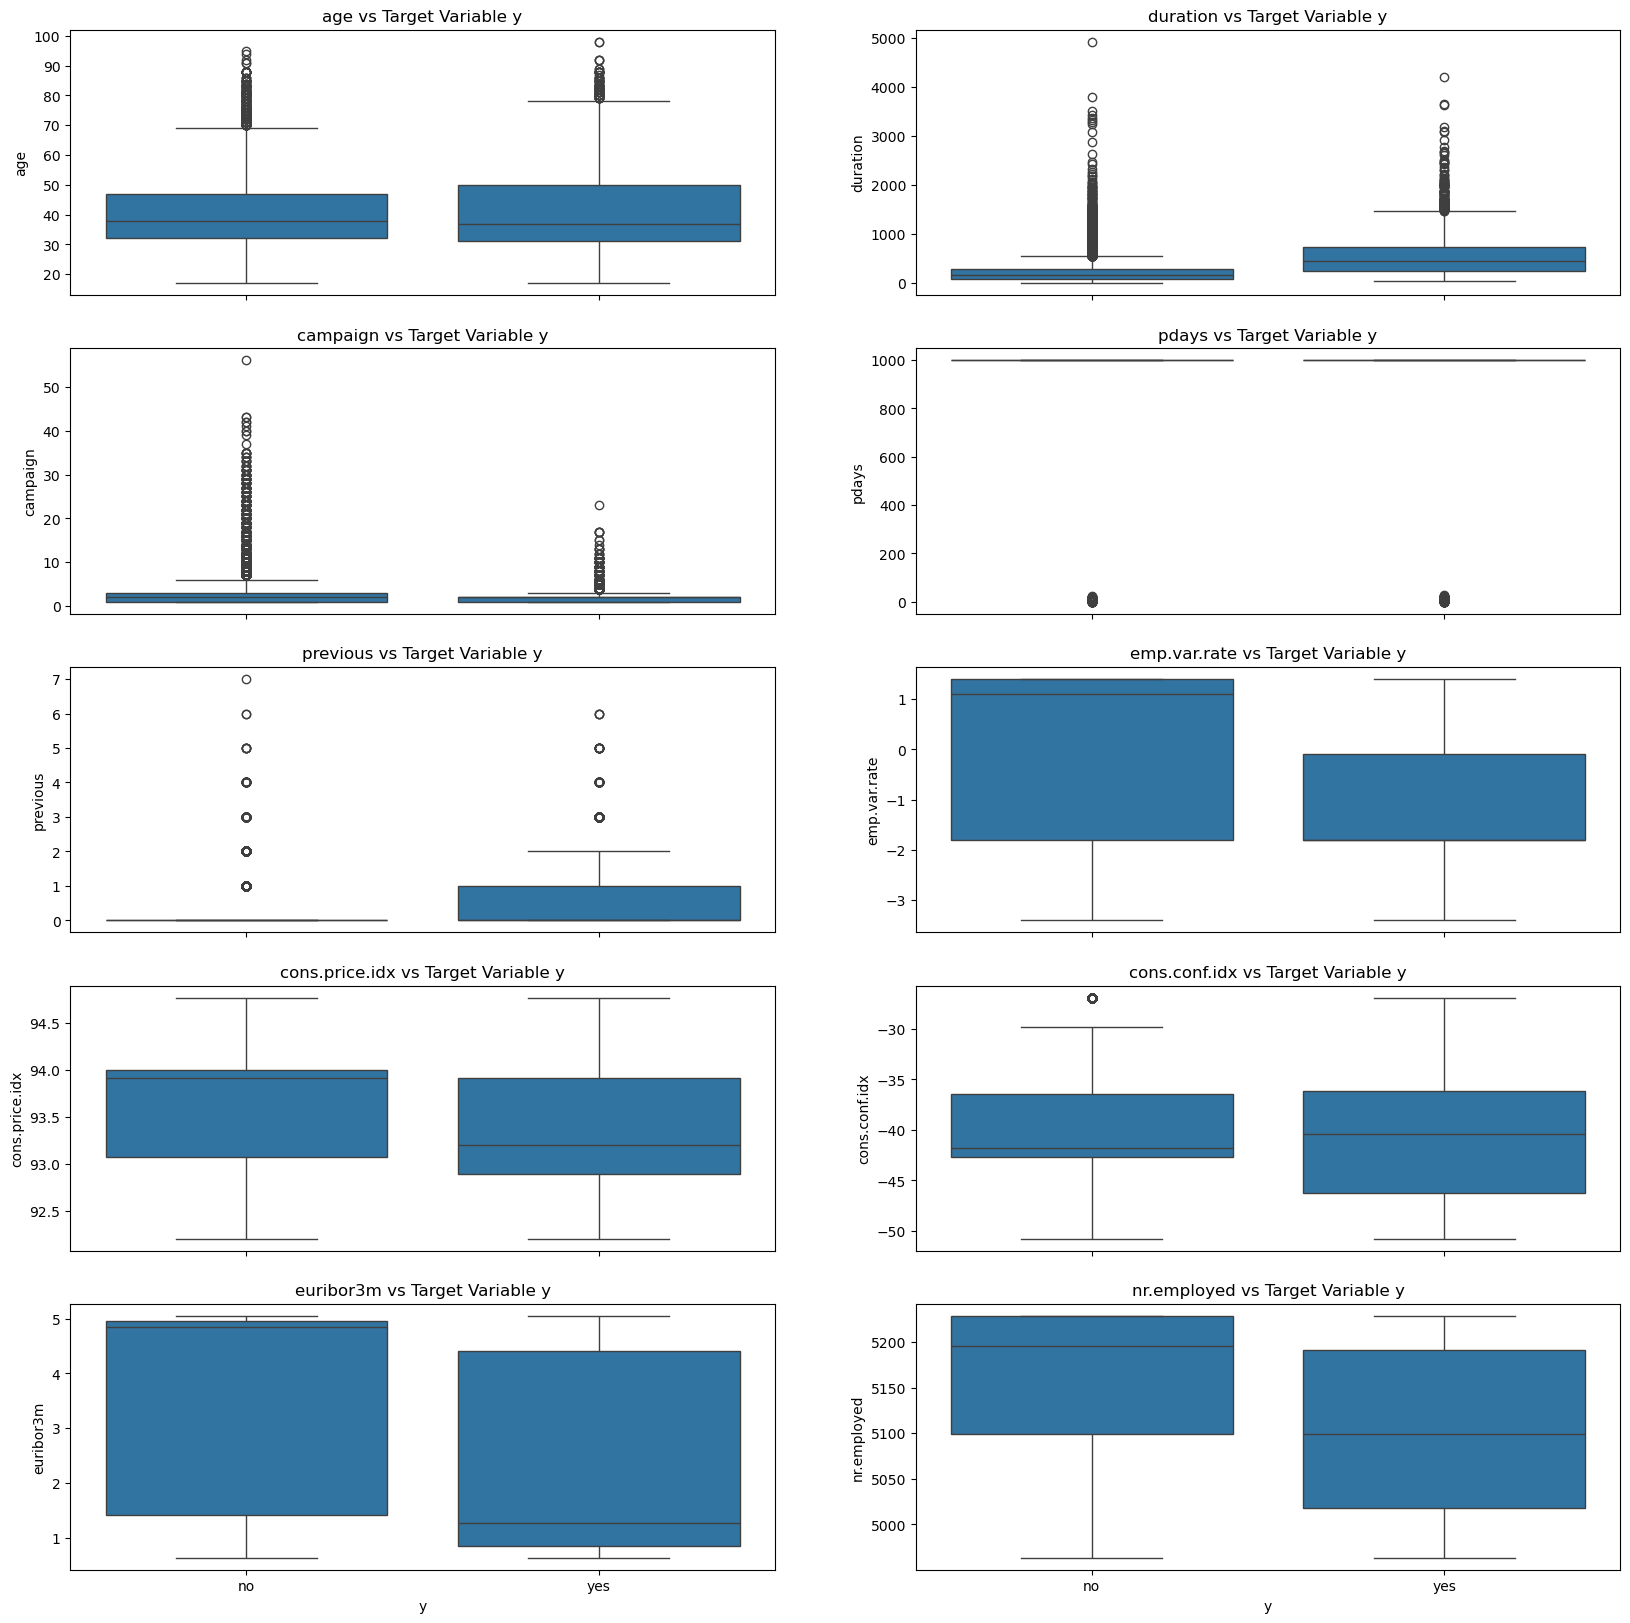

In [24]:
# Plot Numerical Columns against Target Variable y
fig, ax = plt.subplots(figsize=(20, 20), ncols=2, nrows=len(NumCols)//2, sharex=True)
for i, col in enumerate(NumCols):
    sns.boxplot(x='y', y=col, data=df, ax=ax[i // 2, i % 2])
    ax[i // 2, i % 2].set_title(f'{col} vs Target Variable y')
    # ax[i // 2, i % 2].set_xlabel('Target Variable y')
    ax[i // 2, i % 2].set_ylabel(col)

C:\Users\user\AppData\Local\Temp\ipykernel_7220\3567552701.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='Set2')


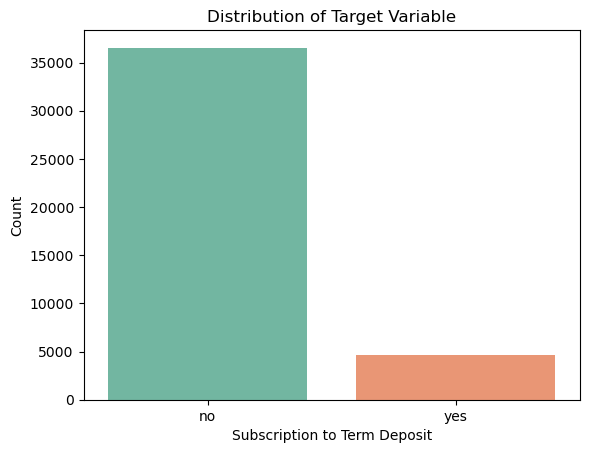

In [25]:
sns.countplot(x='y', data=df, palette='Set2')
plt.title('Distribution of Target Variable')
plt.xlabel('Subscription to Term Deposit')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Categorical analysis

In [26]:
CatCols = df.select_dtypes(include=['object', 'category']).columns
NumCols= df.select_dtypes(include=['number']).columns

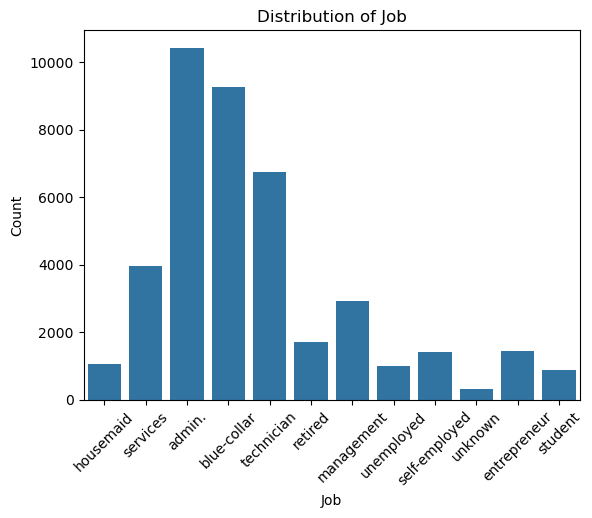

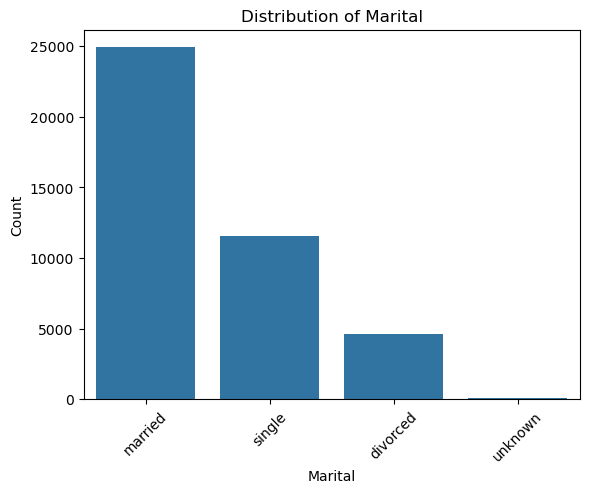

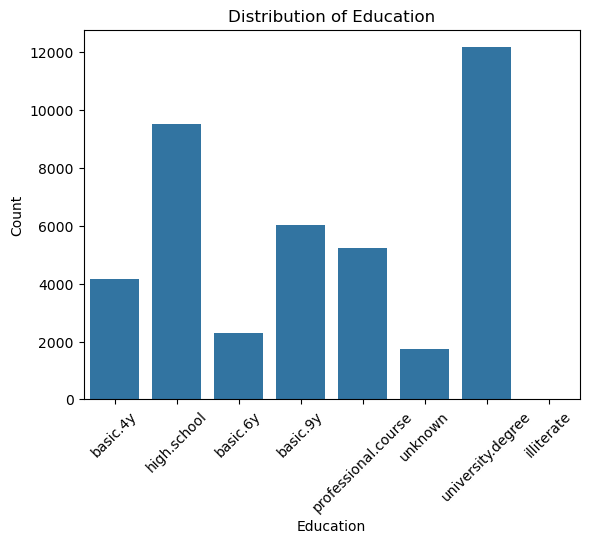

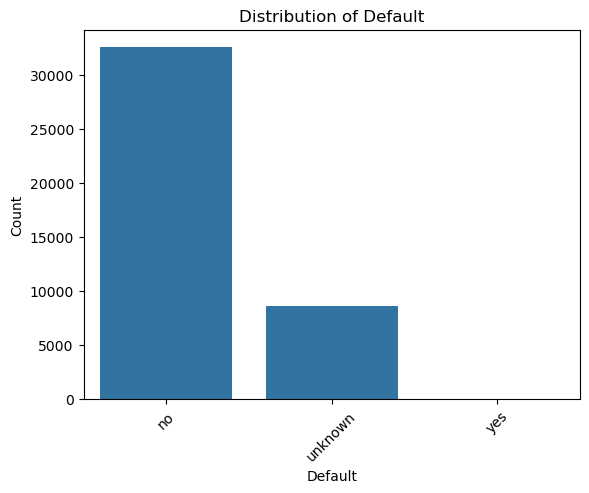

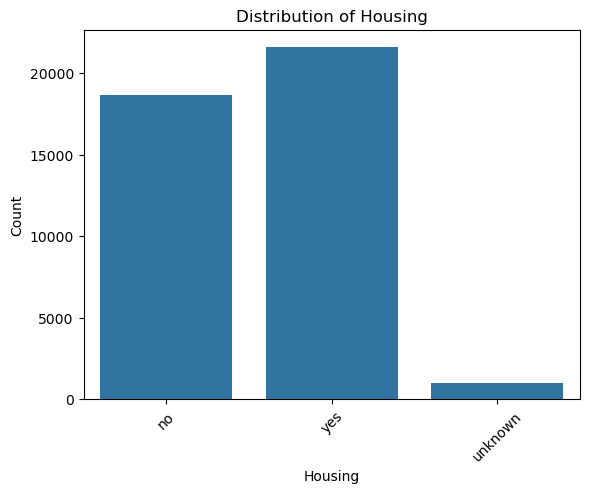

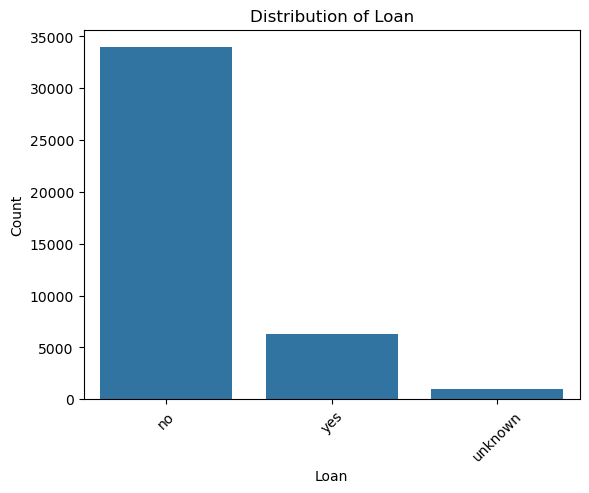

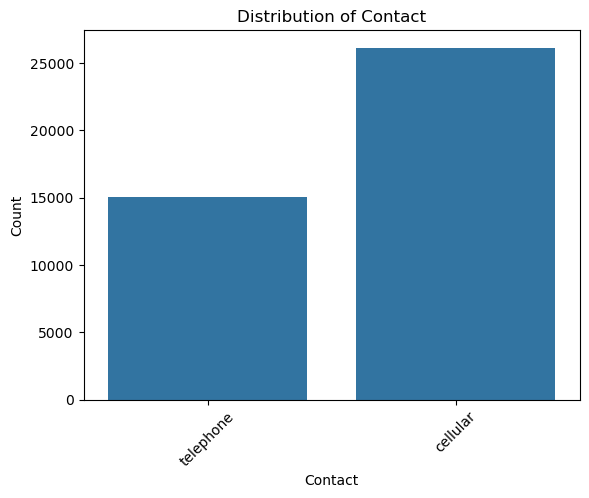

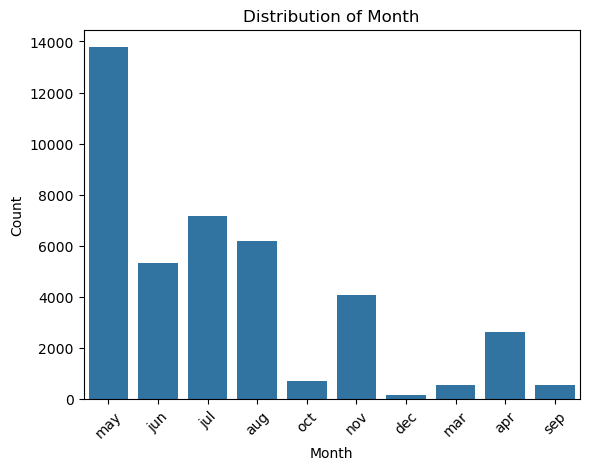

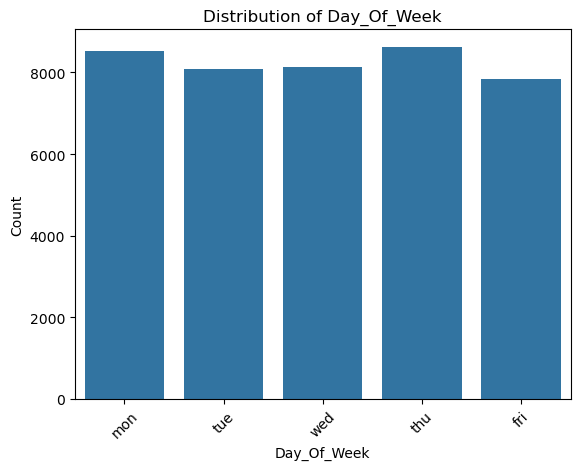

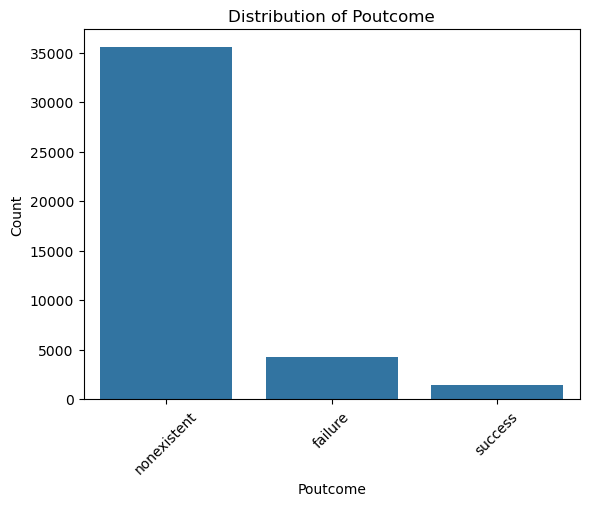

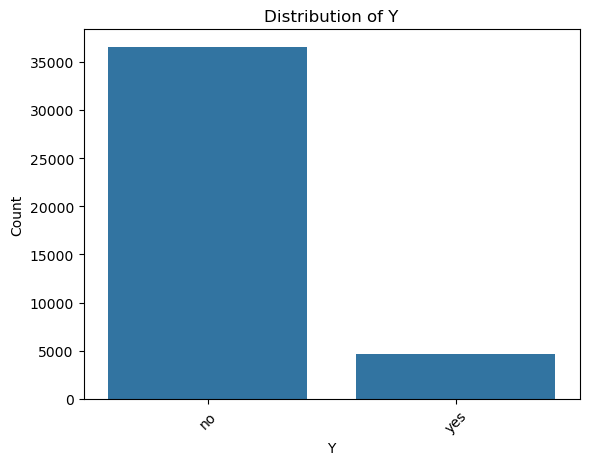

In [27]:
for col in CatCols:
    figsize=(12,6)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col.title()}')
    plt.xlabel(col.title())
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.show()

# Relationship with target variable

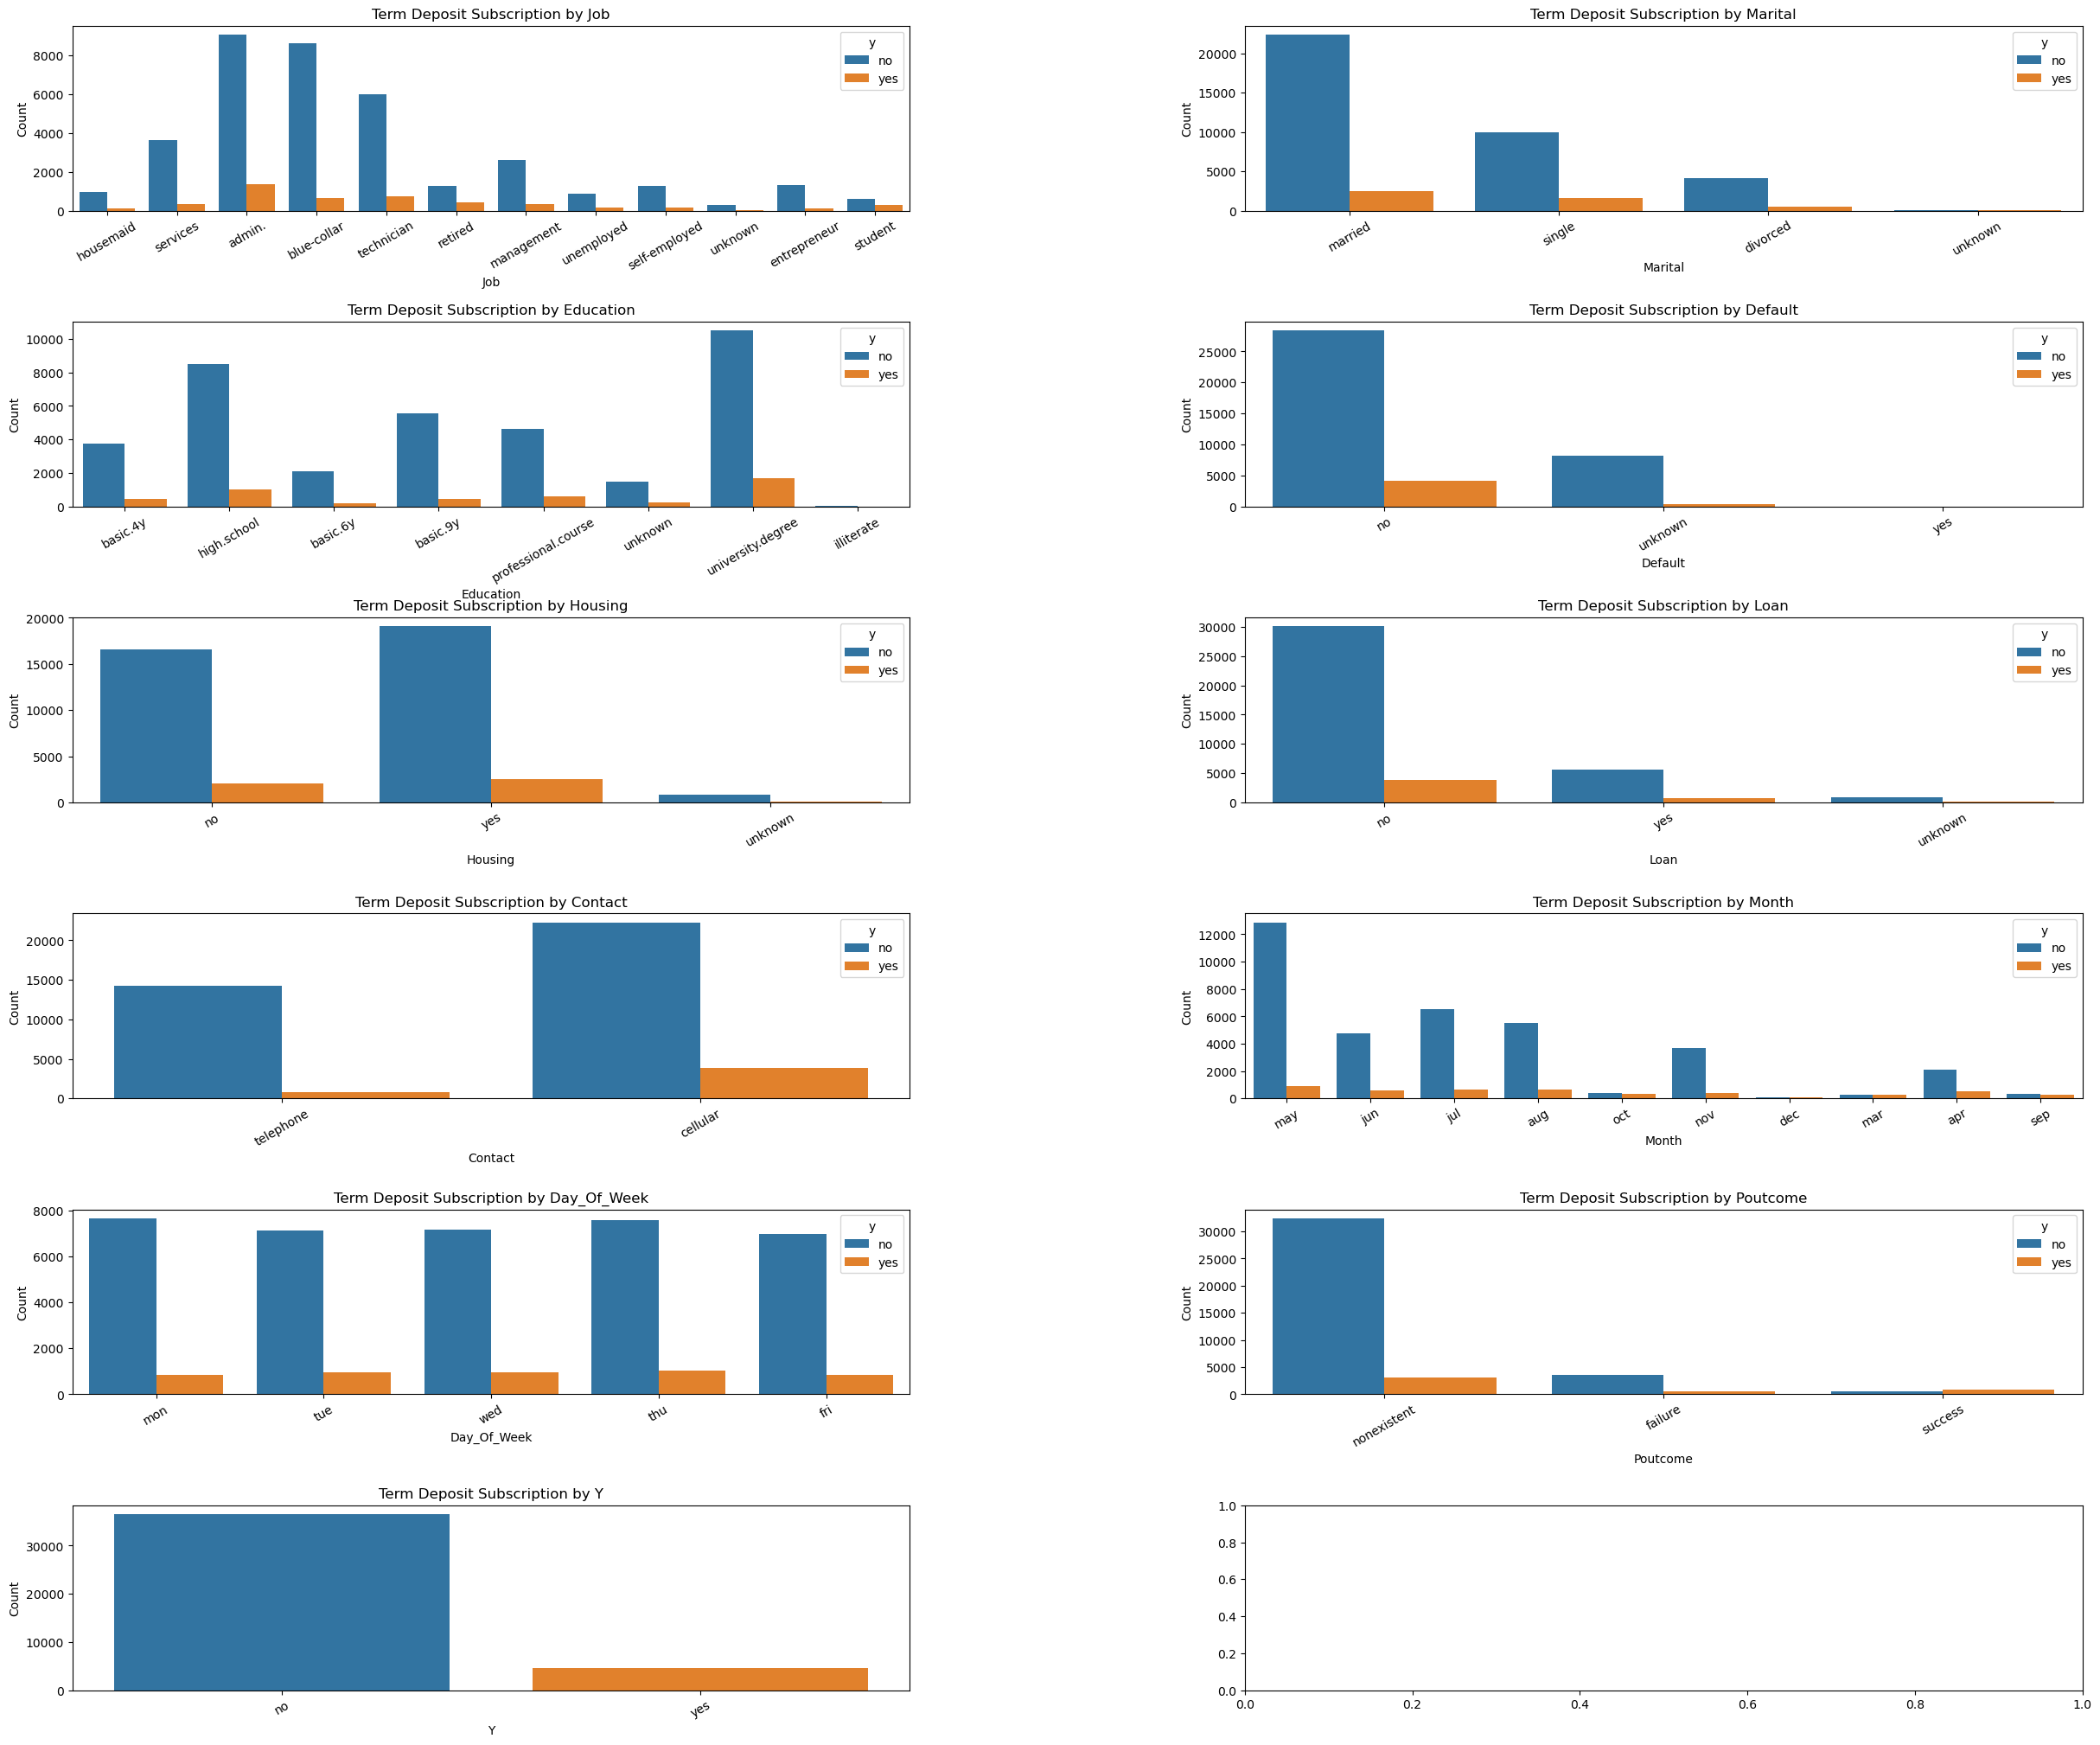

In [28]:
fig, ax= plt.subplots(figsize=(30,25), ncols=2, nrows=len(CatCols)//2+1)
plt.subplots_adjust(wspace=0.4, hspace=0.6)  # Manually adjust gaps


for i, col in enumerate(CatCols):
    sns.countplot(data=df, x=col, hue='y', ax=ax[i//2, i % 2])
    ax[i//2, i % 2].set_title(f'Term Deposit Subscription by {col.title()}')
    ax[i//2, i % 2].set_xlabel(col.title())
    ax[i//2, i % 2].set_ylabel('Count')
    ax[i//2, i % 2].tick_params(axis='x', rotation=30)

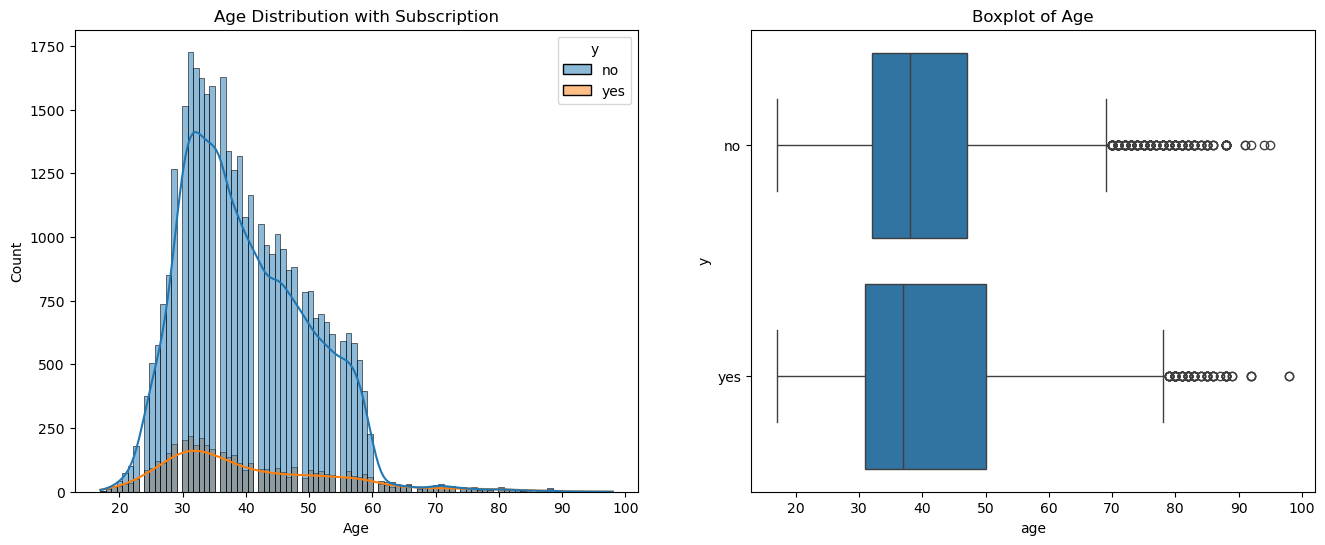

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(data=df, x='age', hue='y', kde=True, ax= axes[0])
axes[0].set_title('Age Distribution with Subscription')
axes[0].set_xlabel('Age')

sns.boxplot(data= df, x='age', y='y', ax=axes[1])
axes[1].set_title('Boxplot of Age')

plt.show()

In [32]:
NumCols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

c:\Users\user\anaconda3\envs\ML\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


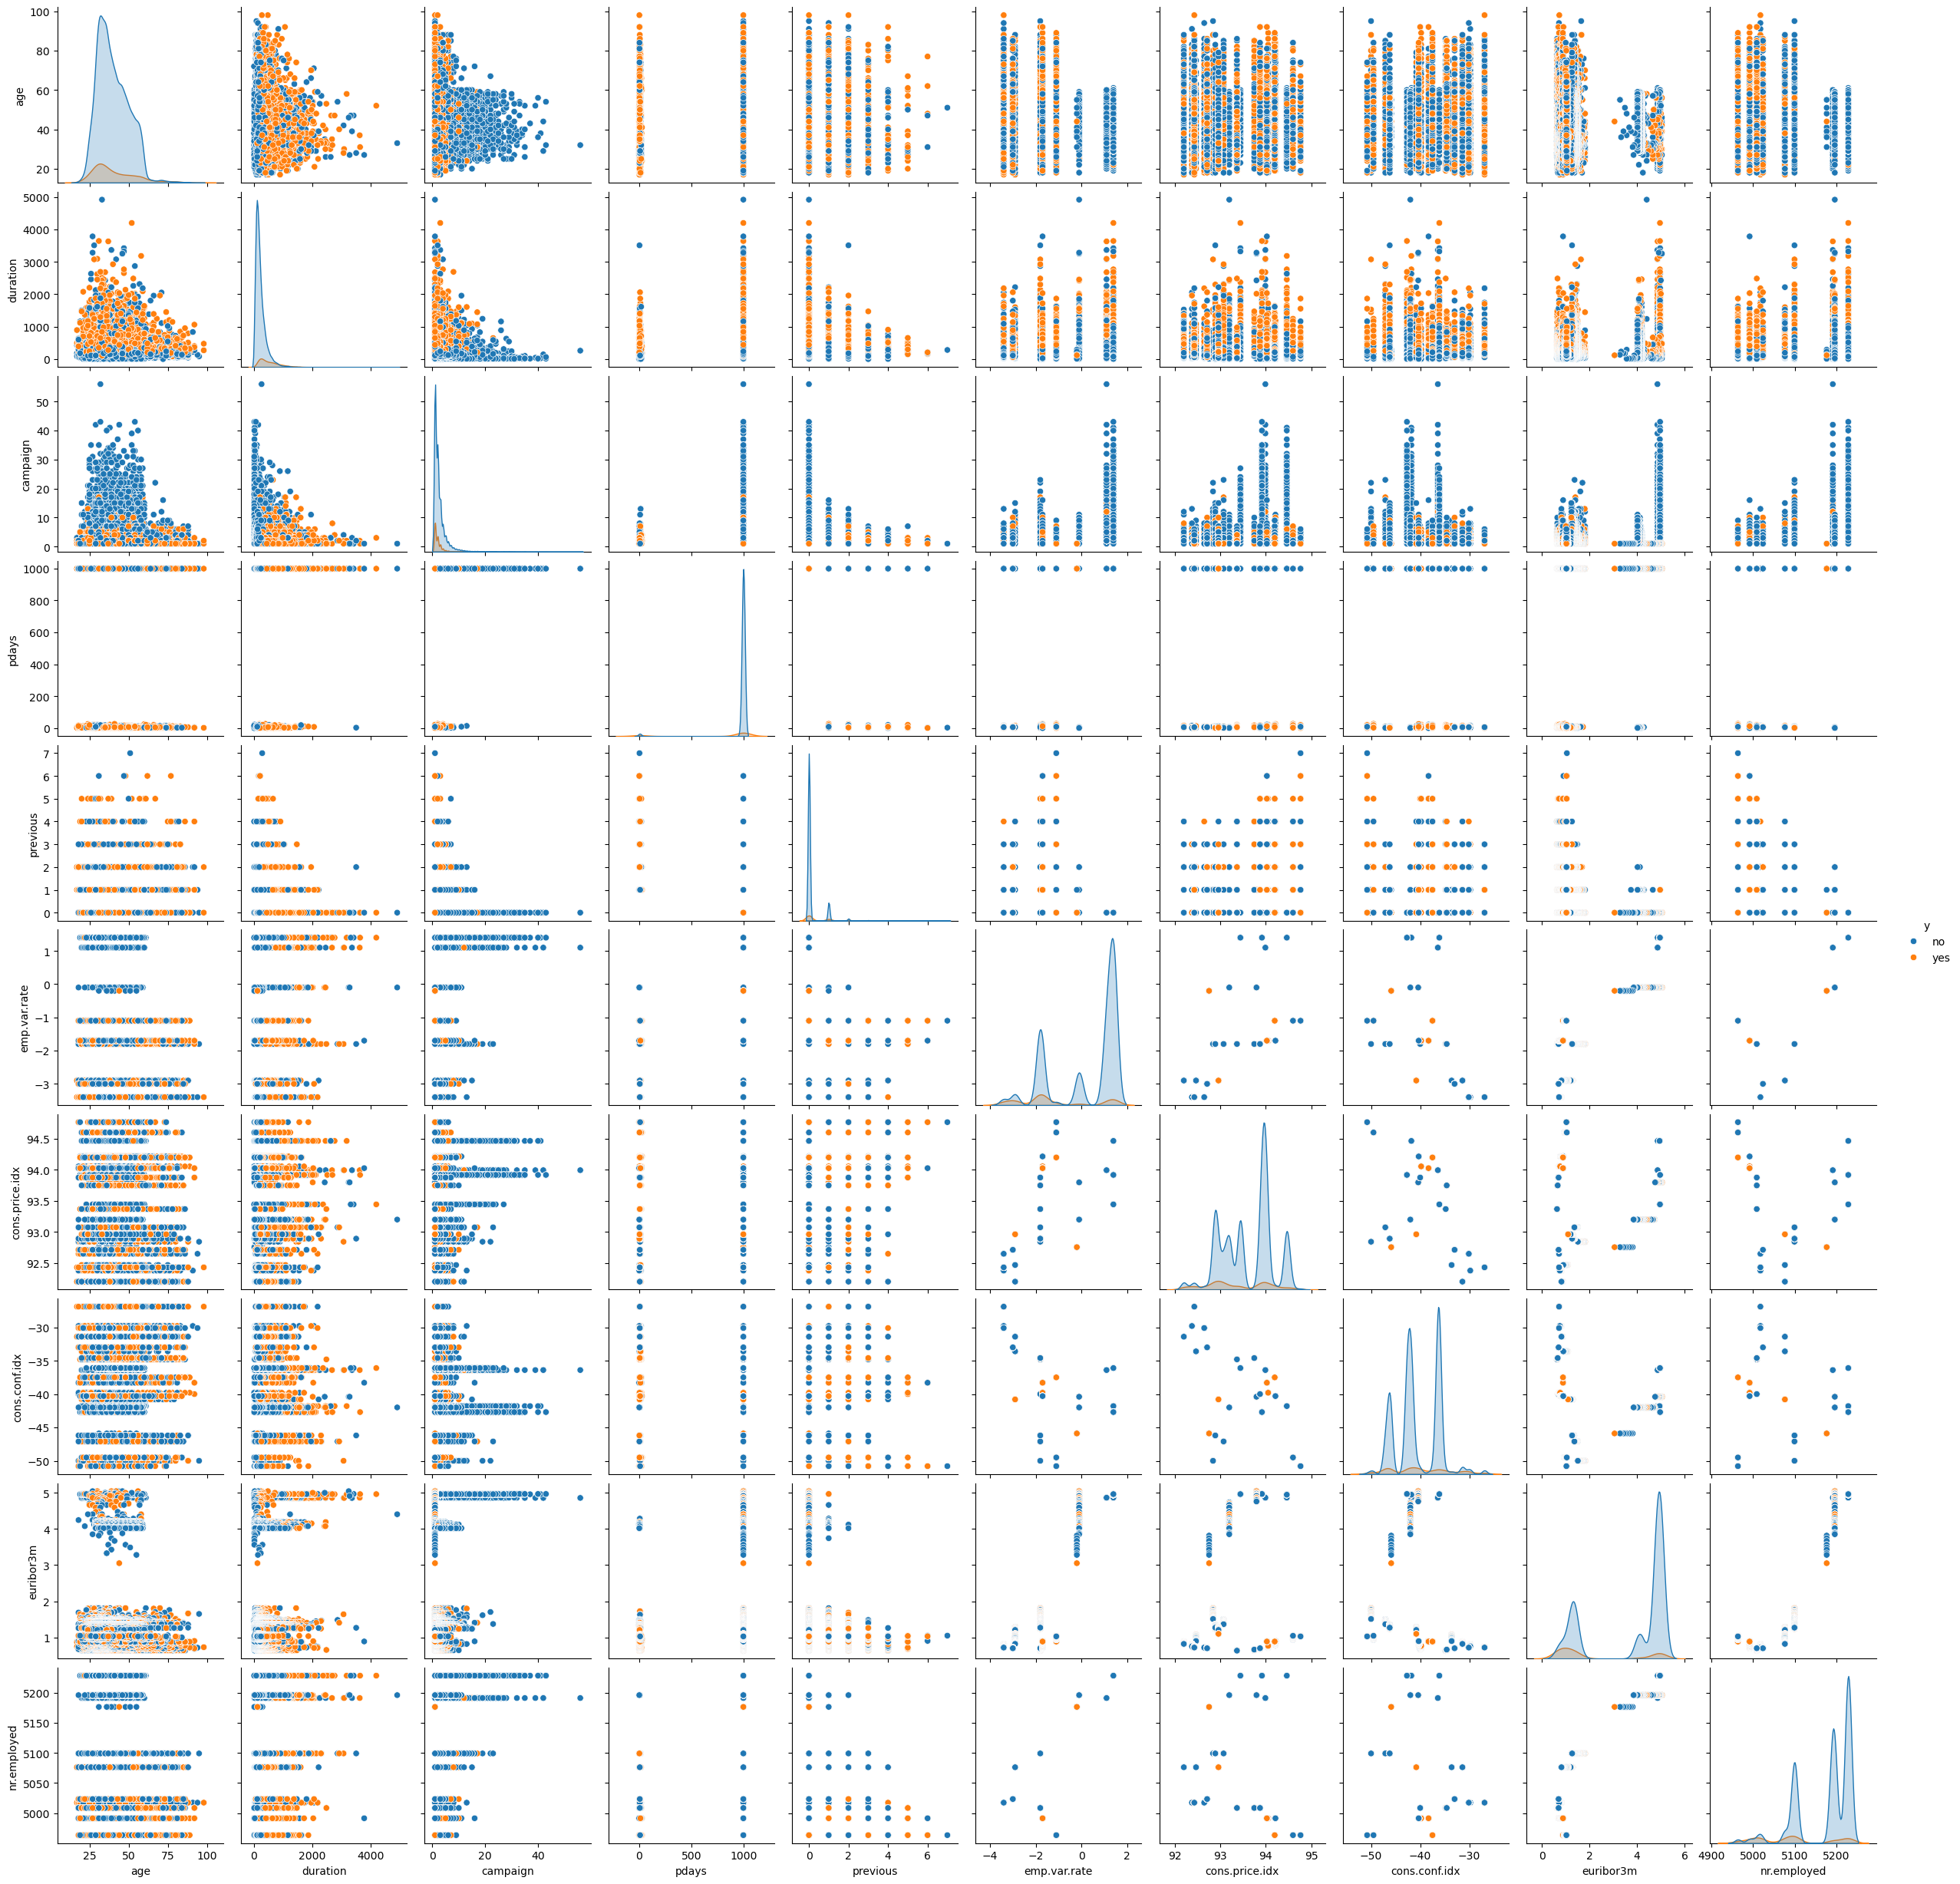

In [33]:
sns.pairplot(df[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']], hue='y')


# Clean data

In [40]:
X_clean = df_clean.drop(columns=['y'])
y_clean = df_clean['y']